# Animal Bites Case-study

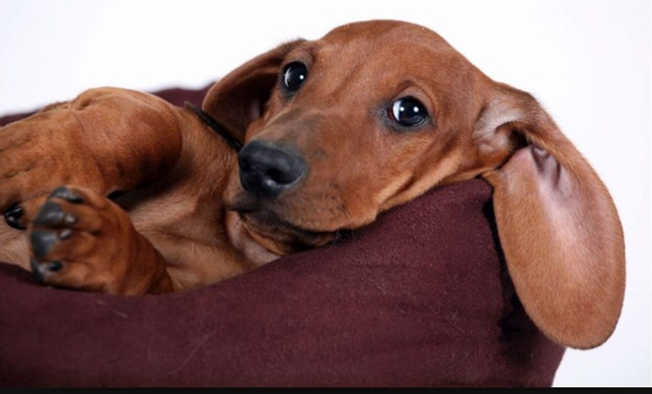


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
animal_bites = pd.read_csv(r'C:\Users\restr\Documents\Springboard\Animal Bites\Health_AnimalBites.csv')

In [3]:
print(animal_bites.head())

             bite_date SpeciesIDDesc BreedIDDesc GenderIDDesc       color  \
0  1985-05-05 00:00:00           DOG         NaN       FEMALE  LIG. BROWN   
1  1986-02-12 00:00:00           DOG         NaN      UNKNOWN   BRO & BLA   
2  1987-05-07 00:00:00           DOG         NaN      UNKNOWN         NaN   
3  1988-10-02 00:00:00           DOG         NaN         MALE   BLA & BRO   
4  1989-08-29 00:00:00           DOG         NaN       FEMALE     BLK-WHT   

   vaccination_yrs     vaccination_date victim_zip AdvIssuedYNDesc  \
0              1.0  1985-06-20 00:00:00      40229              NO   
1              NaN                  NaN      40218              NO   
2              NaN                  NaN      40219              NO   
3              NaN                  NaN        NaN              NO   
4              NaN                  NaN        NaN              NO   

  WhereBittenIDDesc      quarantine_date DispositionIDDesc head_sent_date  \
0              BODY  1985-05-05 00:00:0

From a preliminary look at the dataset, we observe the following columns: 

bite_date: The date when the bite occurred.
SpeciesIDDesc: Description of the species of the animal that bit.
BreedIDDesc: Description of the breed of the animal (if applicable).
GenderIDDesc: Gender of the animal.
color: Color of the animal.
vaccination_yrs: The number of years since the animal was last vaccinated.
vaccination_date: The date of the last vaccination.
victim_zip: ZIP code of the victim.
AdvIssuedYNDesc: Whether an advisory was issued (Yes or No).
WhereBittenIDDesc: The part of the body where the bite occurred.
quarantine_date: The date the animal was quarantined.
DispositionIDDesc: The disposition of the animal after the bite.
head_sent_date: The date the animal's head was sent for testing (typically for rabies).
release_date: The date the animal was released from quarantine or custody.
ResultsIDDesc: The results of any tests, primarily for rabies.

### Objective 

Analyze and understand the patterns, trends, and characteristics associated with over 9,000 animal bites reported near Louisville, Kentucky, from 1985 to 2017. This study aims to highlight the species and breeds most frequently involved in bite incidents, investigate the likelihood of these animals being rabid, and assess the interventions, like quarantine, taken post-incident.

Lets start by visualizing the distribution of bites per species

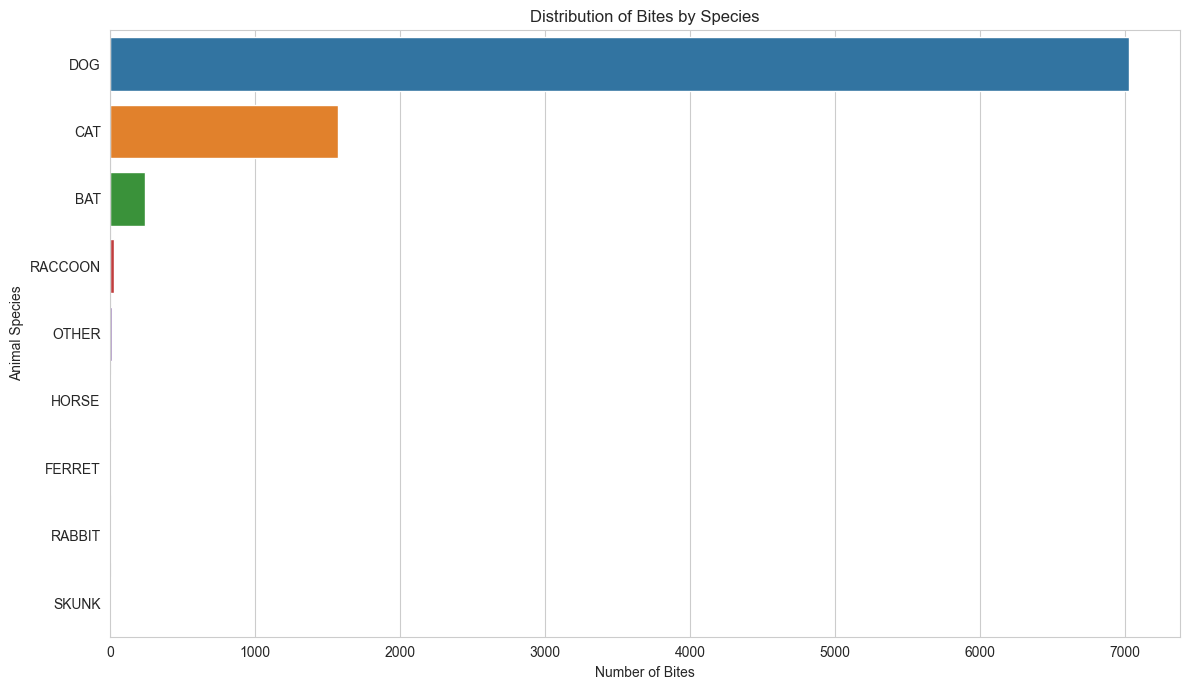

In [5]:
# Plot the distribution of bites by species
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.countplot(y='SpeciesIDDesc', data=animal_bites, order=animal_bites['SpeciesIDDesc'].value_counts().index)
plt.title('Distribution of Bites by Species')
plt.xlabel('Number of Bites')
plt.ylabel('Animal Species')
plt.tight_layout()
plt.show()

From the graph, we see that Dogs are by far the most common species involved in bite incidents, followed by cats and bats.

Next we will look at the top breeds responsible for bites. This will give us insight into 
which specific breeds of animals (especially dogs) tend to be more aggressive or involved in bite incidents.

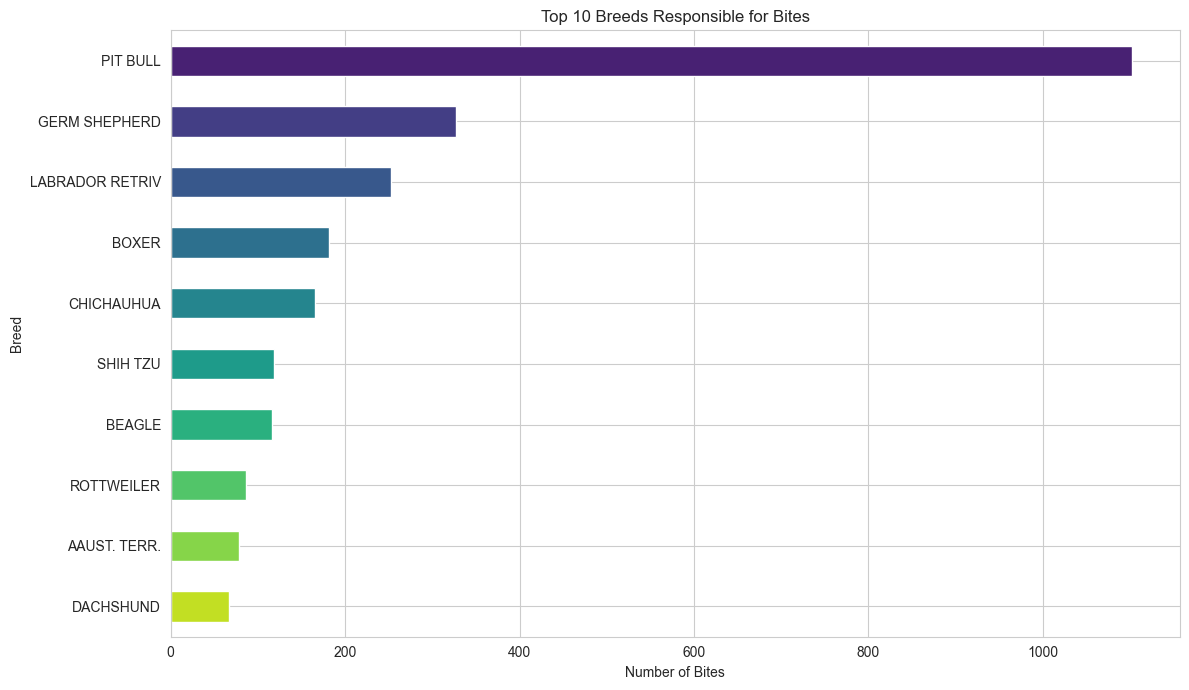

In [6]:
# Plot the top breeds responsible for bites
top_breeds = animal_bites['BreedIDDesc'].value_counts().head(10)

plt.figure(figsize=(12, 7))
top_breeds.plot(kind='barh', color=sns.color_palette("viridis", 10))
plt.title('Top 10 Breeds Responsible for Bites')
plt.xlabel('Number of Bites')
plt.ylabel('Breed')
plt.gca().invert_yaxis()  # Invert y-axis to have the breed with the highest count at the top
plt.tight_layout()
plt.show()

The Pit Bull is the most frequently reported in bite incidents, followed by German Shepherd and Labrador Retriever and Boxer. 


Now, let's explore the temporal aspect of the data. When do these bites usually occur? 

We'll check if there's any seasonality or trend in bites over the years.

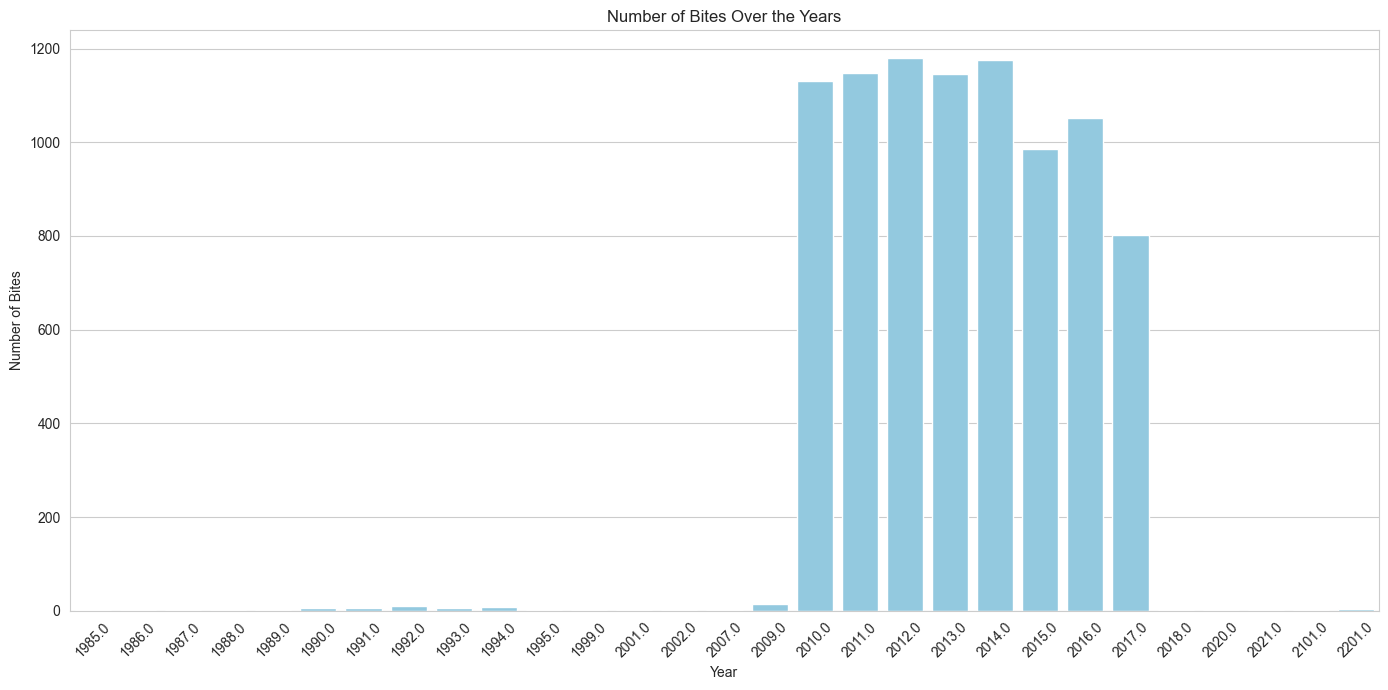

In [7]:
# Convert the 'bite_date' column to datetime format and extract the year
animal_bites['bite_date'] = pd.to_datetime(animal_bites['bite_date'], errors='coerce')
animal_bites['bite_year'] = animal_bites['bite_date'].dt.year

# Filter out invalid years
valid_years = animal_bites[animal_bites['bite_year'] > 1980]

# Plot the number of bites over the years
plt.figure(figsize=(14, 7))
sns.countplot(x='bite_year', data=valid_years, color='skyblue')
plt.title('Number of Bites Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows:

- A general increase in the number of reported animal bites from the mid-1980s to the mid-2010s.

- There's a significant drop in the number of reports after 2015, but this might be due to incomplete data for subsequent years or other external factors? This a point for future study. 

Next, we'll analyze the gender distribution of the animals involved in bite incidents. 

Are male animals more likely to bite than female ones?

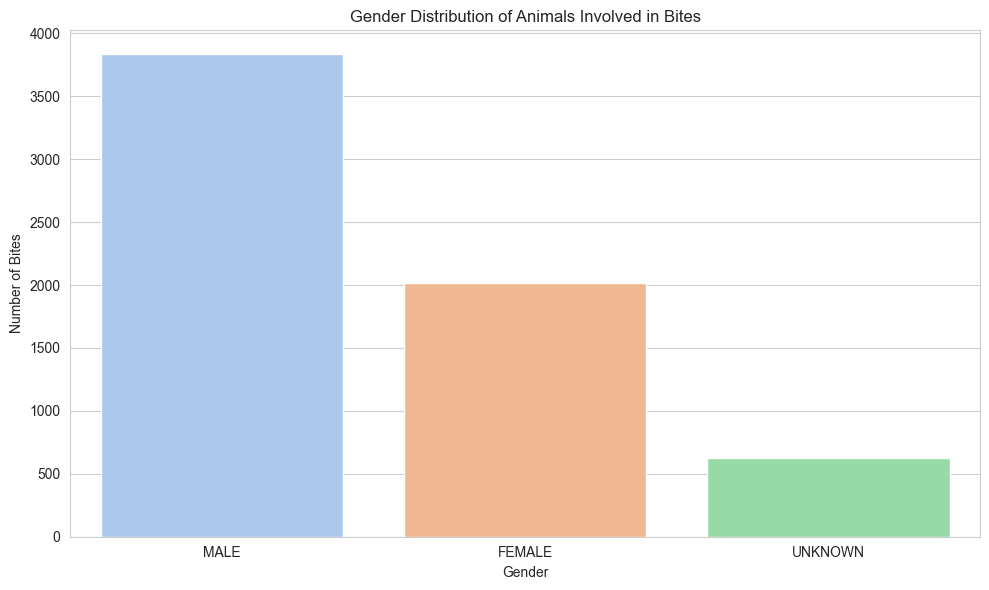

In [8]:
# Plot the gender distribution of animals involved in bites
plt.figure(figsize=(10, 6))
sns.countplot(x='GenderIDDesc', data=animal_bites, order=animal_bites['GenderIDDesc'].value_counts().index, palette="pastel")
plt.title('Gender Distribution of Animals Involved in Bites')
plt.xlabel('Gender')
plt.ylabel('Number of Bites')
plt.tight_layout()
plt.show()


- Male animals are involved in bite incidents more frequently than female animals.

- There is a significant number of entries with unknown gender.

Now, let's move on to the probability of an animal being rabid after a bite incident. 

We'll calculate the proportion of animals that were found to be rabid after biting.

In [9]:
# Calculate the proportion of animals that were found to be rabid
rabies_counts = animal_bites['ResultsIDDesc'].value_counts()

# Calculate the probability of rabid
prob_rabid = rabies_counts['POSITIVE'] / rabies_counts.sum()

print(prob_rabid)


0.002592352559948153


The probability that an animal involved in a bite incident is rabid is aproximately 0.26 %.

This low probability tells us that the vast majority of animals involved in bite incidents are not rabid.

Finally, let's explore the common features of the animals that were confirmed to be rabid. 

We'll describe the species, breed, gender, and color of the rabid animals.

In [10]:
# Filter the dataset for animals that were confirmed rabid
rabid_animals = animal_bites[animal_bites['ResultsIDDesc'] == 'POSITIVE']

# Describe the common features of rabid animals
rabid_features = rabid_animals[['SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color']].describe()

print(rabid_features)


       SpeciesIDDesc      BreedIDDesc GenderIDDesc  color
count              4                1            1      1
unique             2                1            1      1
top              BAT  GREAT PYRENEESE       FEMALE  WHITE
freq               3                1            1      1


From the above results on the animals that were confirmed rebid:

Species: Out of the four animals, three were bats and one was a different species. This suggests that bats are of important concern when it comes to rabies transmission.

Breed: Only one of the rabid animals had its breed specified, which was 'GREAT PYRENEESE'.

Gender: Only one of the rabid animals had its gender recorded, and it was female.

Color: Only one of the rabid animals had its color noted, which was white.


We should highlight the limited data on the rabid animals -> only four confirmed cases and missing data on some of them. 

### Conclusions

1. Dog bites are the most common, with Pit Bulls leading the breed count.
2. The number of bite incidents increased from the 1980s to mid-2010s.
3. Male animals are more frequently involved in bite incidents.
4. The likelihood of an animal being rabid is quite low, around 0.26%.
5. Among the confirmed rabid animals, bats were the most common species.

### Future Directions

1. Impact of Dog Size on Bite Incidents:

While the current study has highlighted specific breeds that are more frequently involved in bite incidents, a more granular analysis considering the size of the dog could provide further insights. We observed that many of the dogs with the most bites are larger, but there were some noticeable smaller dogs in there as well. 

2. Detailed Analysis of Data Post-2015:

The noticeable drop in reported bite incidents after 2015 requires further investigation. 

Potential reasons for this decline could include:

- Incomplete data collection or reporting in subsequent years.
- Effective community interventions or awareness campaigns leading to a genuine reduction in incidents.
- Changes in reporting mechanisms or criteria for what constitutes a reportable bite.

3. Expansion to Other Regions:

While this study focuses on Louisville, Kentucky, expanding the analysis to other regions or comparing Louisville's data with other cities can provide a broader perspective on animal bite incidents and the factors influencing them.
